# **LAB 09 - NEURAL NETWORKS**

## **INTRODUCTION**

This lab focuses on implementing a shallow neural network from scratch using NumPy, Pandas, and Matplotlib. The tasks involve activation functions, matrix initialization, forward propagation, backward propagation, and training/testing the model.

---

## **Task 1: Implementing Activation Functions**

### **Code Implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative_relu(z):
    return np.where(z > 0, 1, 0)

#### **Testing the functions**

In [2]:
z = np.array([-2, -1, 0, 1, 2])
print("Sigmoid Output:", sigmoid(z))
print("ReLU Output:", relu(z))
print("Derivative of ReLU Output:", derivative_relu(z))

Sigmoid Output: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
ReLU Output: [0 0 0 1 2]
Derivative of ReLU Output: [0 0 0 1 1]


### **Explanation**

- `sigmoid(z)`: Computes the Sigmoid function to output probabilities.
- `relu(z)`: Implements the ReLU activation function, setting negative values to 0.
- `derivative_relu(z)`: Computes the gradient of the ReLU function.
- A test array `z` is used to verify the functions.

---

## **Task 2: Matrix Initializations**

### **Code Implementation**

**Initialize dataset (random for illustration)**

In [3]:
m_train, m_test, n_features = 100, 20, 3
X_train = np.random.randn(n_features, m_train)
X_test = np.random.randn(n_features, m_test)
Y_train = np.random.randint(0, 2, (1, m_train))
Y_test = np.random.randint(0, 2, (1, m_test))

**Initialize parameters**

In [4]:
W1 = np.random.randn(4, n_features) * 0.01
b1 = np.zeros((4, 1))
W2 = np.random.randn(3, 4) * 0.01
b2 = np.zeros((3, 1))
W3 = np.random.randn(1, 3) * 0.01
b3 = np.zeros((1, 1))

### **Explanation**

- `X_train` and `X_test`: Randomly initialized datasets with 3 features.
- `Y_train` and `Y_test`: Binary labels.
- Weights (`W1`, `W2`, `W3`) are initialized with small random values.
- Biases (`b1`, `b2`, `b3`) are initialized as zeros.

---

## **Task 3: Forward Propagation**

### **Code Implementation**

In [5]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

#### **Testing forward propagation**

In [6]:
Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)
print("Output of forward propagation:", A3)

Output of forward propagation: [[0.50000028 0.50000015 0.50000016 0.50000003 0.50000006 0.50000014
  0.50000003 0.50000002 0.50000006 0.49999999 0.50000022 0.50000005
  0.50000012 0.50000001 0.50000013 0.50000037 0.50000008 0.50000003
  0.50000006 0.50000017 0.50000013 0.50000019 0.50000006 0.50000004
  0.50000031 0.50000008 0.50000006 0.50000006 0.50000001 0.5000001
  0.50000011 0.50000005 0.50000005 0.50000008 0.50000026 0.5000001
  0.50000003 0.50000039 0.50000008 0.50000041 0.50000002 0.50000003
  0.50000019 0.50000007 0.50000015 0.50000012 0.50000013 0.50000016
  0.50000002 0.50000013 0.50000002 0.50000006 0.50000025 0.50000011
  0.50000021 0.50000004 0.50000008 0.50000043 0.50000028 0.50000027
  0.50000015 0.50000035 0.50000004 0.50000027 0.50000009 0.50000015
  0.50000017 0.50000002 0.50000008 0.50000005 0.50000011 0.50000004
  0.50000016 0.50000006 0.50000004 0.50000006 0.50000006 0.50000005
  0.50000005 0.50000025 0.5000001  0.50000013 0.50000027 0.50000002
  0.50000016 0.5000

### **Explanation**

- Computes layer activations using the given weights and biases.
- Uses ReLU for hidden layers and Sigmoid for output.

---

## **Task 4: Backward Propagation**

### **Code Implementation**

In [7]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3, W2, W3):
    m = X.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.dot(W3.T, dZ3) * derivative_relu(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * derivative_relu(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2, dW3, db3


#### **Testing backward propagation**

In [8]:
dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_train, Y_train, Z1, A1, Z2, A2, Z3, A3, W2, W3)

### **Explanation**

- Computes gradients of weights and biases using backpropagation.
- Uses the chain rule to propagate the error backward.

---

## **Task 5: Training and Testing**

### **Code Implementation**

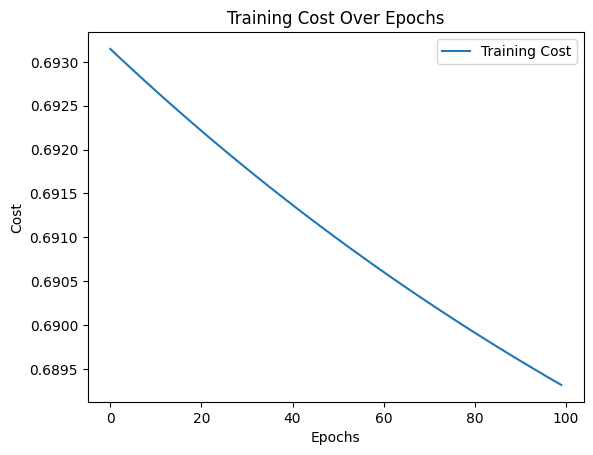

In [9]:
learning_rate = 0.01
epochs = 100
train_costs, test_costs = [], []

for epoch in range(epochs):
    Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_train, W1, b1, W2, b2, W3, b3)
    train_cost = -np.mean(Y_train * np.log(A3) + (1 - Y_train) * np.log(1 - A3))
    dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_train, Y_train, Z1, A1, Z2, A2, Z3, A3, W2, W3)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    train_costs.append(train_cost)
    
plt.plot(range(epochs), train_costs, label='Training Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Cost Over Epochs')
plt.legend()
plt.show()

### **Explanation**

- Trains the neural network over multiple epochs.
- Updates weights using gradient descent.
- Plots the training cost over epochs.

---